In [1]:
import numpy as np
import mylibrary.nnlib as tnn
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import copy

matplotlib.rcParams['figure.figsize'] = (12, 8)

#### Dataset 0

In [2]:
num_points = 50
X1 = np.linspace(-2.5, 1.5, num_points)
X2 = np.linspace(-2, 4, num_points)
X1, X2 = np.meshgrid(X1, X2)
Y = np.sin(np.sqrt(X1**2 + X2**2))*2-1.

#### Dataset 1

In [3]:
# x1min, x1max, nx1 = -5, 4, 75
# x2min, x2max, nx2 = -3, 7, 75
# x1, x2 = np.linspace(x1min, x1max, nx1), np.linspace(x2min, x2max, nx2)
# X1, X2 = np.meshgrid(x1, x2)

# def gaussian(x1, x2, x10, x20, x1alpha, x2alpha, A):
#     return A * np.exp( -((x1-x10)/x1alpha)**2 -((x2-x20)/x2alpha)**2)

# gprms = [(0, 2, 2.5, 5.4, 1.5),
#          (-1, 4, 6, 2.5, 1.8),
#          (-3, -0.5, 1, 2, 4),
#          (3, 0.5, 2, 1, 5)
#         ]
# Y = np.zeros(X1.shape)
# for p in gprms:
#     Y += gaussian(X1, X2, *p)

#### Scaling/Plotting the data

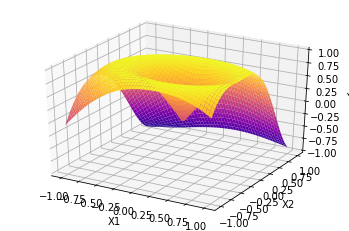

In [4]:
####Scaling the data to range -1,1
X1 = 2*(X1 - X1.min())/(X1.max() - X1.min()) -1
X2 = 2*(X2 - X2.min())/(X2.max() - X2.min()) -1
Y = 2*(Y - Y.min())/(Y.max() - Y.min()) -1

x1 = X1.reshape(-1)
x2 = X2.reshape(-1)

%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
# ax.scatter(X1, X2, Y)
ax.plot_surface(X1, X2, Y, cmap='plasma')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

In [5]:
xx = np.c_[x1, x2]
yy = Y.reshape(-1,1)

optimizer = tnn.Adam()

## Sigmoid choose from two linear

In [6]:
prob = tnn.LinearLayer(2,1,optimizer=optimizer)
sigmoid = tnn.Sigmoid()
linear0 = tnn.LinearLayer(2,1, optimizer=optimizer)
linear1 = tnn.LinearLayer(2,1, optimizer=optimizer)

In [7]:
%matplotlib tk
fig = plt.figure()
ax = fig.gca(projection='3d')

for epoch in range(100000):

    pout = prob.forward(xx)
    sout = sigmoid.forward(pout)
    
    l0 = linear0.forward(xx)
    l1 = linear1.forward(xx)
    
    y0 = (1-sout)*l0
    y1 = sout*l1
    yout = y0 + y1
    
    dy = yout - yy
    dy0 = dy
    dy1 = dy
    
    dl0 = dy0*(1-sout)
    dl1 = dy1*sout
    
    dx0 = linear0.backward(dl0)
    dx1 = linear1.backward(dl1)
    
    dsout = -dy0*l0+ dy1*l1
    dpout = sigmoid.backward(dsout)
    
    dxp = prob.backward(dpout)
    
    dx = dxp+dx0+dx1

    prob.update()
    linear0.update()
    linear1.update()
    
    
    if epoch%100 == 0:
        
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear()
        
        ax.scatter(X1, X2, Y)
        ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
        
#         linexx = pout#np.zeros_like(pout)
#         linexx = linexx - prob.bias
#         linexx = linexx@np.linalg.pinv(prob.weights)
#         ax.scatter(linexx[:,0], linexx[:,1], np.zeros_like(yout.reshape(-1)), color='r', marker='.')
        
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_zlabel('Y')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  0.6400741591376086


100 Error =  0.14578139637121285


200 Error =  0.1015283741444965


300 Error =  0.059560959334819585


400 Error =  0.046952509714111135


500 Error =  0.04404277972897665


600 Error =  0.042524201084442055


700 Error =  0.04143281341596514


800 Error =  0.04062724267430908


900 Error =  0.040010182677405914


1000 Error =  0.0395058995338775


1100 Error =  0.03906473798499592


1200 Error =  0.03865934290941429


1300 Error =  0.03827736999815758


1400 Error =  0.03791431315377133


1500 Error =  0.03756860403588536


1600 Error =  0.03723944485336732


1700 Error =  0.036926614379322896


1800 Error =  0.03663118344673545


1900 Error =  0.03635619599136844


2000 Error =  0.036106509586532456


2100 Error =  0.03588740518039896


2200 Error =  0.0357025196376356


2300 Error =  0.03555238835936335


2400 Error =  0.03543440929214422


2500 Error =  0.0353438814200929


2600 Error =  0.03527528020549824


2700 Error =  0.03522324792271366


280

TclError: invalid command name "pyimage21"

In [24]:
prob.weights

array([[ -4904.91995138],
       [-21473.40112046]])

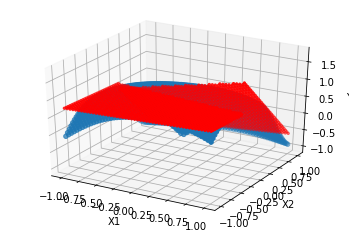

In [27]:
%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X1, X2, Y)
ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()